In [20]:
import pandas as pd

In [24]:
import pandas as pd

# Läs in CSV-filen
df = pd.read_csv('C:/Users/johan.ahl/Desktop/prog1/slutprog/blkjckhands.csv')

# Skriv ut de första raderna för att se datan
print("De första raderna i din data:")
print(df.head())

# Skriv ut kolumnnamnen för att se exakt hur de är skrivna
print("Kolumnnamn i datan:")
print(df.columns.tolist())


De första raderna i din data:
   Unnamed: 0 PlayerNo  card1  card2  card3  card4  card5  sumofcards  \
0           0  Player1      7     10      0      0      0          17   
1           1  Player2     10      9      0      0      0          19   
2           2  Player3      9      8      0      0      0          17   
3           3  Player4      2     10      0      5      0          17   
4           4  Player5     10      2      0      5      0          17   

   dealcard1  dealcard2  ...  dealcard4  dealcard5  sumofdeal  blkjck winloss  \
0         10          8  ...          0          0         18   nowin    Loss   
1         10          8  ...          0          0         18   nowin     Win   
2         10          8  ...          0          0         18   nowin    Loss   
3         10          8  ...          0          0         18   nowin    Loss   
4         10          8  ...          0          0         18   nowin    Loss   

  plybustbeat dlbustbeat plwinamt  dlwinamt 

In [28]:
import pandas as pd


df = pd.read_csv('C:/Users/johan.ahl/Desktop/prog1/slutprog/blkjckhands.csv')

# Beräkna totalt antal spel per resultat
total_count = df['winloss'].value_counts()

# Beräkna antal vinster
win_count = df[df['winloss'] == 'W']['winloss'].value_counts()

# Skapa en ny DataFrame för att visa totalt antal och vinstprocent
summary_df = pd.DataFrame({
    'Total Count': total_count,
    'Win Percentage': (total_count / total_count.sum() * 100).round(2)
})
# Specifik vinstprocent endast för vinster
win_percentage = (total_count['Win'] / total_count.sum() * 100) if 'Win' in total_count.index else 0

# Uppdatera DataFrame
summary_df.loc['Win', 'Win Percentage'] = win_percentage.round(2)

# Visa den slutliga tabellen
print(summary_df)

         Total Count  Win Percentage
winloss                             
Loss          429821           47.76
Win           385946           42.88
Push           84233            9.36


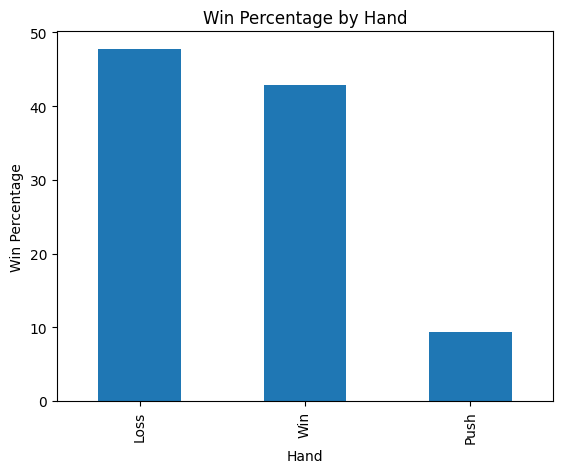

In [29]:
import matplotlib.pyplot as plt  # Importerar plottingbiblioteket matplotlib

summary_df['Win Percentage'].plot(kind='bar')  # Skapar ett stapeldiagram från DataFrame
plt.title('Win Percentage by Hand')  # Titel på grafen
plt.xlabel('Hand')  # Namn på x-axeln
plt.ylabel('Win Percentage')  # Namn på y-axeln
plt.show()  # Visar grafen

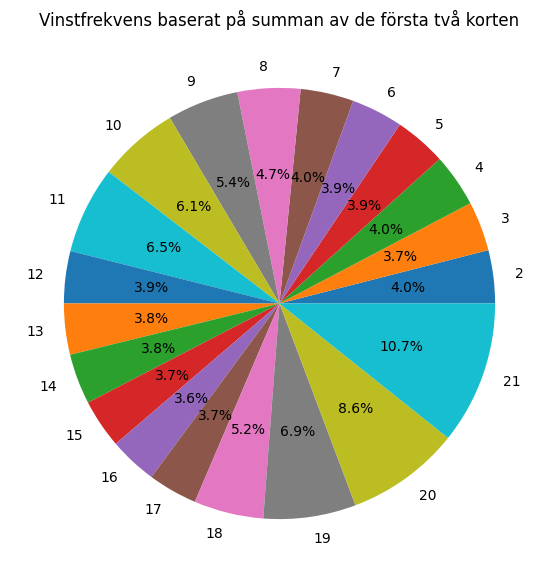

In [15]:
import matplotlib.pyplot as plt

# Skapa en kolumn som indikerar om spelaren vann ('Win')
df['is_win'] = df['winloss'].apply(lambda x: 1 if x == 'Win' else 0)

# Gruppera data baserat på summan av de första två korten och beräkna vinstfrekvensen
win_rates = df.groupby('ply2cardsum')['is_win'].mean()

# Skapa en cirkeldiagram för att visualisera vinstfrekvensen för varje kortsumma
plt.figure(figsize=(10, 7))
win_rates.plot(kind='pie', autopct='%1.1f%%')
plt.title('Vinstfrekvens baserat på summan av de första två korten')
plt.ylabel('')  # Ta bort y-axelns etikett för estetiska skäl
plt.show()
